In [1]:
import pandas as pd
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from crimebb import *

In [3]:
YEAR="2021"

In [4]:
DATA_PATH="../data/"
SQL_PATH = f"{DATA_PATH}sql/{YEAR}/"
CSV_PATH = f"{DATA_PATH}csv/{YEAR}/"

In [5]:
verifyDir(CSV_PATH)

### Database connection

In [6]:
config = openFile(f'{DATA_PATH}/db_config.json')
config_file = config['postgres_connection']
config_file

{'host': 'localhost',
 'username': 'postgres',
 'password': '123456',
 'port': 9200}

### Listing db sizes

In [7]:
list_dbs, path_dbs, dict_dbs = get_db_names(f"{SQL_PATH}/*.sql")

print("DB Name\n", list_dbs,"\n")

DB Name
 ['antichat-2021-01-10', 'deutschland-im-deep-web-2021-01-10', 'dread-2021-01-10', 'envoy-forum-2021-01-10', 'garage4hackers-2021-01-10', 'raidforums-2021-01-10', 'runion-2021-01-10', 'safe-sky-hacks-2021-01-10', 'the-hub-2021-01-10', 'torum-2021-01-10'] 



In [8]:
db_dict = getDBsSize(config_file, list_dbs)

db: antichat-2021-01-10 size: 1124 MB
db: deutschland-im-deep-web-2021-01-10 size: 24 MB
db: dread-2021-01-10 size: 153 MB
db: envoy-forum-2021-01-10 size: 9713 kB
db: garage4hackers-2021-01-10 size: 13 MB
db: raidforums-2021-01-10 size: 85 MB
db: runion-2021-01-10 size: 202 MB
db: safe-sky-hacks-2021-01-10 size: 58 MB
db: the-hub-2021-01-10 size: 65 MB
db: torum-2021-01-10 size: 24 MB


In [9]:
# sed -i 's/"Site"/site/g' crimeBB_2019-10-31_*
# sed -i 's/"Forum"/forum/g' crimeBB_2019-10-31_*
# sed -i 's/"Post"/post/g' crimeBB_2019-10-31_*
# sed -i 's/"Member"/member/g' crimeBB_2019-10-31_*
# sed -i 's/"Thread"/thread/g' crimeBB_2019-10-31_*
# sed -i 's/"ReputationVotes"/reputationvotes/g' crimeBB_2019-10-31_*

,size,num_size,str_size,val_size
db_name,,,,
antichat-2021-01-10,1124 MB,1124,MB,1124000
runion-2021-01-10,202 MB,202,MB,202000
dread-2021-01-10,153 MB,153,MB,153000
raidforums-2021-01-10,85 MB,85,MB,85000
the-hub-2021-01-10,65 MB,65,MB,65000
safe-sky-hacks-2021-01-10,58 MB,58,MB,58000
deutschland-im-deep-web-2021-01-10,24 MB,24,MB,24000
torum-2021-01-10,24 MB,24,MB,24000
garage4hackers-2021-01-10,13 MB,13,MB,13000


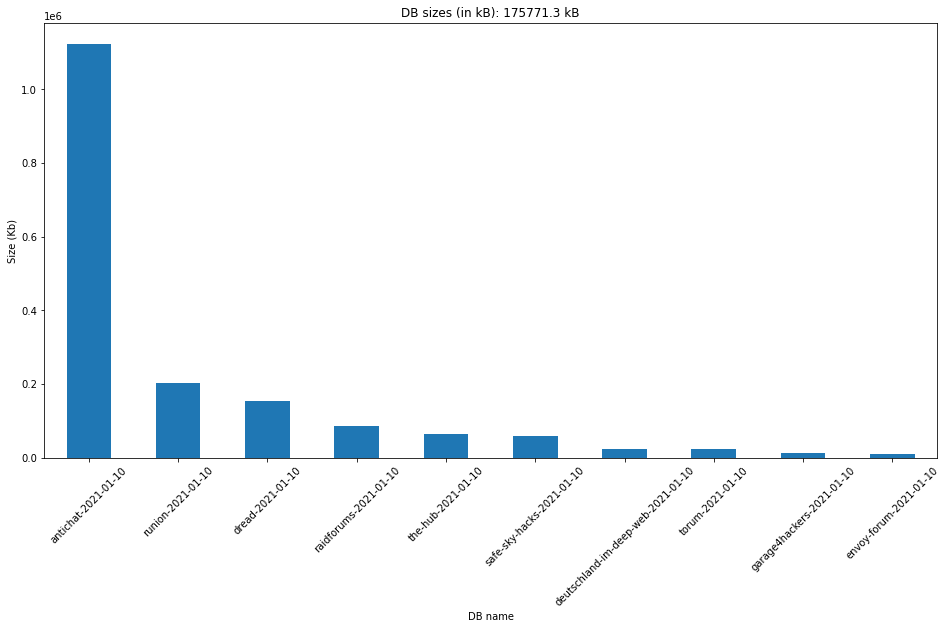

In [10]:
pdCSVdb(db_dict, year_studied=YEAR)

### Listing tables sizes

In [11]:
getTableSize(config_file, list_dbs)

db: antichat-2021-01-10 tables:
     relname  num_elements  size_mb  size_bytes
0      posts       2449875   942 MB   987324416
1    threads        243176    46 MB    47841280
2    members         79887    21 MB    22380544
3     boards            64    16 kB       16384
4  contracts             0  0 bytes           0
5      votes             0  0 bytes           0
db: deutschland-im-deep-web-2021-01-10 tables:
     relname  num_elements     size_mb  size_bytes
0      posts         20185       11 MB    11796480
1    threads          4075      776 kB      794624
2    members          2516      536 kB      548864
3     boards             0  8192 bytes        8192
4  contracts             0     0 bytes           0
5      votes             0     0 bytes           0
db: dread-2021-01-10 tables:
     relname  num_elements  size_mb  size_bytes
0      posts        294596   105 MB   109846528
1    threads         75122    14 MB    15171584
2    members         52406    11 MB    11173888
3     b

### List Tables

In [12]:
tables_dict = listDBtables(config_file, list_dbs)

In [13]:
tables_dict

{'antichat-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'deutschland-im-deep-web-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'dread-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'envoy-forum-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'garage4hackers-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'raidforums-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'runion-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'safe-sky-hacks-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'the-hub-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',
  'votes'],
 'torum-2021-01-10': ['boards',
  'contracts',
  'members',
  'posts',
  'threads',

### Converting to CSV

In [14]:
for db_name in list_dbs:
    list_tables = tables_dict[db_name]
    print(list_tables)
    for cur_table in list_tables:
        cmd_table_to_csv(f"{db_name}", f"{cur_table}", f"{CSV_PATH}{db_name}/", passwd=config_file["password"])

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... antichat-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d antichat-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/antichat-2021-01-10//boards.csv csv header;'"
COPY 64


Senha: 

Table to CSV ... antichat-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d antichat-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/antichat-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... antichat-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d antichat-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/antichat-2021-01-10//members.csv csv header;'"


Senha: 

COPY 79887
Table to CSV ... antichat-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d antichat-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/antichat-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 2449404
Table to CSV ... antichat-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d antichat-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/antichat-2021-01-10//threads.csv csv header;'"


Senha: 

COPY 243176
Table to CSV ... antichat-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d antichat-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/antichat-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... deutschland-im-deep-web-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d deutschland-im-deep-web-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/deutschland-im-deep-web-2021-01-10//boards.csv csv header;'"
COPY 43


Senha: 

Table to CSV ... deutschland-im-deep-web-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d deutschland-im-deep-web-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/deutschland-im-deep-web-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... deutschland-im-deep-web-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d deutschland-im-deep-web-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/deutschland-im-deep-web-2021-01-10//members.csv csv header;'"
COPY 2516


Senha: 

Table to CSV ... deutschland-im-deep-web-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d deutschland-im-deep-web-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/deutschland-im-deep-web-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 20185
Table to CSV ... deutschland-im-deep-web-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d deutschland-im-deep-web-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/deutschland-im-deep-web-2021-01-10//threads.csv csv header;'"
COPY 4075


Senha: 

Table to CSV ... deutschland-im-deep-web-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d deutschland-im-deep-web-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/deutschland-im-deep-web-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... dread-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d dread-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/dread-2021-01-10//boards.csv csv header;'"
COPY 446


Senha: 

Table to CSV ... dread-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d dread-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/dread-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... dread-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d dread-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/dread-2021-01-10//members.csv csv header;'"


Senha: 

COPY 52406
Table to CSV ... dread-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d dread-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/dread-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 294596
Table to CSV ... dread-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d dread-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/dread-2021-01-10//threads.csv csv header;'"


Senha: 

COPY 75122
Table to CSV ... dread-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d dread-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/dread-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... envoy-forum-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d envoy-forum-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/envoy-forum-2021-01-10//boards.csv csv header;'"
COPY 93


Senha: 

Table to CSV ... envoy-forum-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d envoy-forum-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/envoy-forum-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... envoy-forum-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d envoy-forum-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/envoy-forum-2021-01-10//members.csv csv header;'"
COPY 364


Senha: 

Table to CSV ... envoy-forum-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d envoy-forum-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/envoy-forum-2021-01-10//posts.csv csv header;'"
COPY 2163


Senha: 

Table to CSV ... envoy-forum-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d envoy-forum-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/envoy-forum-2021-01-10//threads.csv csv header;'"
COPY 454


Senha: 

Table to CSV ... envoy-forum-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d envoy-forum-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/envoy-forum-2021-01-10//votes.csv csv header;'"


Senha: 

COPY 0
['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... garage4hackers-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d garage4hackers-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/garage4hackers-2021-01-10//boards.csv csv header;'"
COPY 35


Senha: 

Table to CSV ... garage4hackers-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d garage4hackers-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/garage4hackers-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... garage4hackers-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d garage4hackers-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/garage4hackers-2021-01-10//members.csv csv header;'"
COPY 881


Senha: 

Table to CSV ... garage4hackers-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d garage4hackers-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/garage4hackers-2021-01-10//posts.csv csv header;'"
COPY 7697


Senha: 

Table to CSV ... garage4hackers-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d garage4hackers-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/garage4hackers-2021-01-10//threads.csv csv header;'"
COPY 2096


Senha: 

Table to CSV ... garage4hackers-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d garage4hackers-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/garage4hackers-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... raidforums-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d raidforums-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/raidforums-2021-01-10//boards.csv csv header;'"
COPY 75


Senha: 

Table to CSV ... raidforums-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d raidforums-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/raidforums-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... raidforums-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d raidforums-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/raidforums-2021-01-10//members.csv csv header;'"


Senha: 

COPY 46111
Table to CSV ... raidforums-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d raidforums-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/raidforums-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 214856
Table to CSV ... raidforums-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d raidforums-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/raidforums-2021-01-10//threads.csv csv header;'"


Senha: 

COPY 34798
Table to CSV ... raidforums-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d raidforums-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/raidforums-2021-01-10//votes.csv csv header;'"
COPY 3973


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... runion-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d runion-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/runion-2021-01-10//boards.csv csv header;'"
COPY 19


Senha: 

Table to CSV ... runion-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d runion-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/runion-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... runion-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d runion-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/runion-2021-01-10//members.csv csv header;'"
COPY 17343


Senha: 

Table to CSV ... runion-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d runion-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/runion-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 240632
Table to CSV ... runion-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d runion-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/runion-2021-01-10//threads.csv csv header;'"


Senha: 

COPY 16867
Table to CSV ... runion-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d runion-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/runion-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... safe-sky-hacks-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d safe-sky-hacks-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/safe-sky-hacks-2021-01-10//boards.csv csv header;'"
COPY 50


Senha: 

Table to CSV ... safe-sky-hacks-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d safe-sky-hacks-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/safe-sky-hacks-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... safe-sky-hacks-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d safe-sky-hacks-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/safe-sky-hacks-2021-01-10//members.csv csv header;'"
COPY 7471


Senha: 

Table to CSV ... safe-sky-hacks-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d safe-sky-hacks-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/safe-sky-hacks-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 27018
Table to CSV ... safe-sky-hacks-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d safe-sky-hacks-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/safe-sky-hacks-2021-01-10//threads.csv csv header;'"
COPY 12963


Senha: 

Table to CSV ... safe-sky-hacks-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d safe-sky-hacks-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/safe-sky-hacks-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... the-hub-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d the-hub-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/the-hub-2021-01-10//boards.csv csv header;'"
COPY 62


Senha: 

Table to CSV ... the-hub-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d the-hub-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/the-hub-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... the-hub-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d the-hub-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/the-hub-2021-01-10//members.csv csv header;'"
COPY 8340


Senha: 

Table to CSV ... the-hub-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d the-hub-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/the-hub-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 88753
Table to CSV ... the-hub-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d the-hub-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/the-hub-2021-01-10//threads.csv csv header;'"
COPY 11286


Senha: 

Table to CSV ... the-hub-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d the-hub-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/the-hub-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

['boards', 'contracts', 'members', 'posts', 'threads', 'votes']
Table to CSV ... torum-2021-01-10-boards
Excecuting command ...  su -l postgres -c "psql -d torum-2021-01-10 -c '\copy boards to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/torum-2021-01-10//boards.csv csv header;'"
COPY 11


Senha: 

Table to CSV ... torum-2021-01-10-contracts
Excecuting command ...  su -l postgres -c "psql -d torum-2021-01-10 -c '\copy contracts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/torum-2021-01-10//contracts.csv csv header;'"
COPY 0


Senha: 

Table to CSV ... torum-2021-01-10-members
Excecuting command ...  su -l postgres -c "psql -d torum-2021-01-10 -c '\copy members to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/torum-2021-01-10//members.csv csv header;'"
COPY 3835


Senha: 

Table to CSV ... torum-2021-01-10-posts
Excecuting command ...  su -l postgres -c "psql -d torum-2021-01-10 -c '\copy posts to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/torum-2021-01-10//posts.csv csv header;'"


Senha: 

COPY 28485
Table to CSV ... torum-2021-01-10-threads
Excecuting command ...  su -l postgres -c "psql -d torum-2021-01-10 -c '\copy threads to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/torum-2021-01-10//threads.csv csv header;'"
COPY 4346


Senha: 

Table to CSV ... torum-2021-01-10-votes
Excecuting command ...  su -l postgres -c "psql -d torum-2021-01-10 -c '\copy votes to /media/fmorenovr/87ae90e0-7049-439e-854e-b9268b9619f3/github/crimepy/notebooks/../data/csv/2021/torum-2021-01-10//votes.csv csv header;'"
COPY 0


Senha: 

### Listing CSV files

In [15]:
tables_dict = {}

for db_name in list_dbs:
    db_tables = [db_.split("/")[-1] for db_ in glob.glob(f"{CSV_PATH}/{db_name}/*.csv")]
    tables_dict[db_name] = set(db_tables.copy())
    print(db_name, db_tables)

antichat-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
deutschland-im-deep-web-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
dread-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
envoy-forum-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
garage4hackers-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
raidforums-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
runion-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
safe-sky-hacks-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
the-hub-2021-01-10 ['posts.csv', 'contracts.csv', 'members.csv', 'threads.csv', 'boards.csv', 'votes.csv']
to

In [16]:
tables_dict

{'antichat-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'deutschland-im-deep-web-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'dread-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'envoy-forum-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'garage4hackers-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'raidforums-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'runion-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'votes.csv'},
 'safe-sky-hacks-2021-01-10': {'boards.csv',
  'contracts.csv',
  'members.csv',
  'posts.csv',
  'threads.csv',
  'vo

### Joining

In [17]:
tables_final_list = set.intersection(*tables_dict.values())
tables_final_list

{'boards.csv',
 'contracts.csv',
 'members.csv',
 'posts.csv',
 'threads.csv',
 'votes.csv'}

In [19]:
for cur_table in tables_final_list:
    print(cur_table)
    if "HF" in cur_table:
        continue
    if "Reputation" in cur_table:
        continue
    tab_df = pd.DataFrame()
    for db_name in list_dbs:
        db_path = f"{CSV_PATH}{db_name}/"
        db_tables = [db_.split("\\")[-1] for db_ in glob.glob(f"{db_path}/*")]

        table_df = pd.read_csv(f"{db_path}{cur_table}", sep=',', low_memory=False)
        tab_df = pd.concat([tab_df, table_df], ignore_index=True)
    print("num lines:", len(tab_df))
    tab_df.to_csv(f"{CSV_PATH}{cur_table}", sep='\t', index=False)

posts.csv
num lines: 3373789
threads.csv
num lines: 405183
boards.csv
num lines: 898
votes.csv
num lines: 3973
members.csv
num lines: 219154
contracts.csv
num lines: 0
